# EDA actors


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
actors = pd.read_csv("../Dataset/actors_etl.csv")

# configuramos pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Vemos la descripción de los datos y sus estadísticas.
actors.head()

,id_film,cast_id,caracter,credit_id,gender,name,order,profile_path
0,862,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,862,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,862,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,Don Rickles,2.0,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,862,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2.0,Jim Varney,3.0,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,862,18.0,Rex (voice),52fe4284c3a36847f8024fa5,2.0,Wallace Shawn,4.0,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg


In [5]:
# Vemos la descripción de los datos
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564892 entries, 0 to 564891
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_film       564892 non-null  int64  
 1   cast_id       562474 non-null  float64
 2   caracter      536691 non-null  object 
 3   credit_id     562474 non-null  object 
 4   gender        562474 non-null  float64
 5   name          562474 non-null  object 
 6   order         562474 non-null  float64
 7   profile_path  388618 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 34.5+ MB


## Tratamiento de nulos


### Porcentaje de nulos

Total de datos nulos: 216565
Total de datos: 4519136
Porcentaje de datos nulos: 4.79%


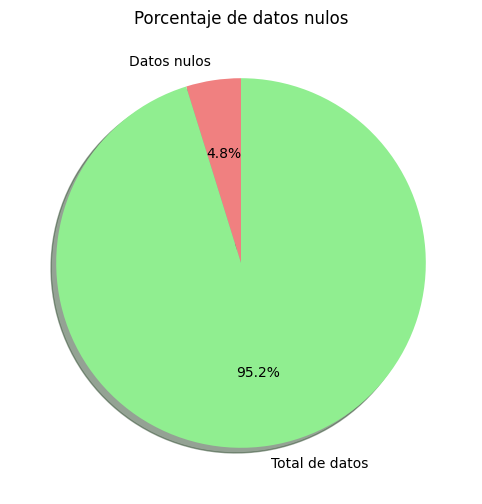

In [6]:
# Calculamos el porcentaje de valores nulos
total_nulos = actors.isna().sum().sum()
total_datos = actors.size
pct_nulos = (total_nulos / total_datos) * 100

# Imprimimos el porcentaje de los datos nulos
print(f"Total de datos nulos: {total_nulos}")
print(f"Total de datos: {total_datos}")
print(f"Porcentaje de datos nulos: {pct_nulos:.2f}%")

# preparamos el grafico
datos = [total_nulos, total_datos - total_nulos]
labels = ["Datos nulos", "Total de datos"]


# Graficamos el porcentaje de datos nulos
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=labels, autopct='%1.1f%%', colors=["lightcoral", "lightgreen"],shadow=True, startangle=90)
plt.title("Porcentaje de datos nulos")
plt.show()

### Tratamos los nulos

In [7]:
print("cantidad de registros:", actors.shape[0])
actors.isna().sum()

cantidad de registros: 564892


id_film              0
cast_id           2418
caracter         28201
credit_id         2418
gender            2418
name              2418
order             2418
profile_path    176274
dtype: int64

Analizando el resultado podemos ver que todos las columnas, excepto 'caracter', que los datos faltantes son las mismas filas asi que las eliminaremos. Y 'profile_path' tiene muchos nulos, ademas de que no aporta nada, lo cual eliminaremos la columna

In [8]:
actors.dropna(subset=["cast_id"], inplace=True)
actors.drop("profile_path", axis=1, inplace=True)

Veamos mas a detalle la columna caracter para ver que tipo de imputacion podemos hacer

In [9]:
actors["caracter"].value_counts().head(10)

caracter
Himself         11437
Herself          3073
Doctor            663
Dancer            584
Narrator          562
Reporter          545
himself           542
Nurse             499
(uncredited)      472
Anna              464
Name: count, dtype: int64

Con esa revision podemos ver que el valor que mas se repite es 'Himself', que significa que actua de si mismo. Por lo tanto podemos llenar la columna 'caracter' con la moda.

In [10]:
actors["caracter"] = actors["caracter"].fillna(actors["caracter"].mode()[0])

Y verificamos la cantidad de nulos y graficamos

Total de datos: 3937318
Cantidad de datos nulos: 0


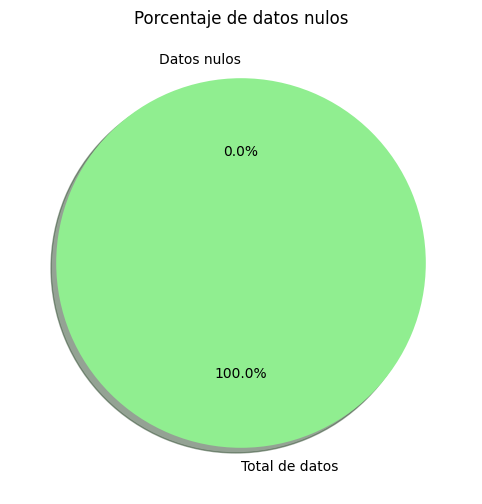

In [11]:
total_datos = actors.size
total_nulos = actors.isna().sum().sum()

print("Total de datos:", total_datos)
print("Cantidad de datos nulos:", total_nulos)

datos = [total_nulos, total_datos - total_nulos]
labels = ["Datos nulos", "Total de datos"]

# Graficamos el porcentaje de datos nulos
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=labels, autopct='%1.1f%%', colors=["lightcoral", "lightgreen"],shadow=True, startangle=90)
plt.title("Porcentaje de datos nulos")
plt.show()


# Duplicados

In [12]:
print("Cantidad de datos duplicados:", actors.duplicated().sum())


Cantidad de datos duplicados: 430


### Eliminamos los datos duplicados

In [13]:
actors.drop_duplicates(inplace=True)
print("Número de datos duplicados:", actors.duplicated().sum())

Número de datos duplicados: 0


# Distribucion de los datos

### Estadisticas del dataset

In [14]:
# Mostramos la descripción de los datos y sus estadísticas.
# Uso el with para limitar los decimales y sea entendible 
with pd.option_context('display.float_format', '{:.5f}'.format):
    print(actors.describe())

           id_film      cast_id       gender        order
count 562044.00000 562044.00000 562044.00000 562044.00000
mean   93675.29009     51.54199      1.00496     11.84889
std   108927.87883    172.93100      0.89510     16.00976
min        2.00000      0.00000      0.00000      0.00000
25%    16923.00000      6.00000      0.00000      3.00000
50%    45013.00000     13.00000      1.00000      7.00000
75%   124054.00000     27.00000      2.00000     14.00000
max   469172.00000   1119.00000      2.00000    313.00000


### Distribucion del histograma

array([[<Axes: title={'center': 'id_film'}>,
        <Axes: title={'center': 'cast_id'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'order'}>]], dtype=object)

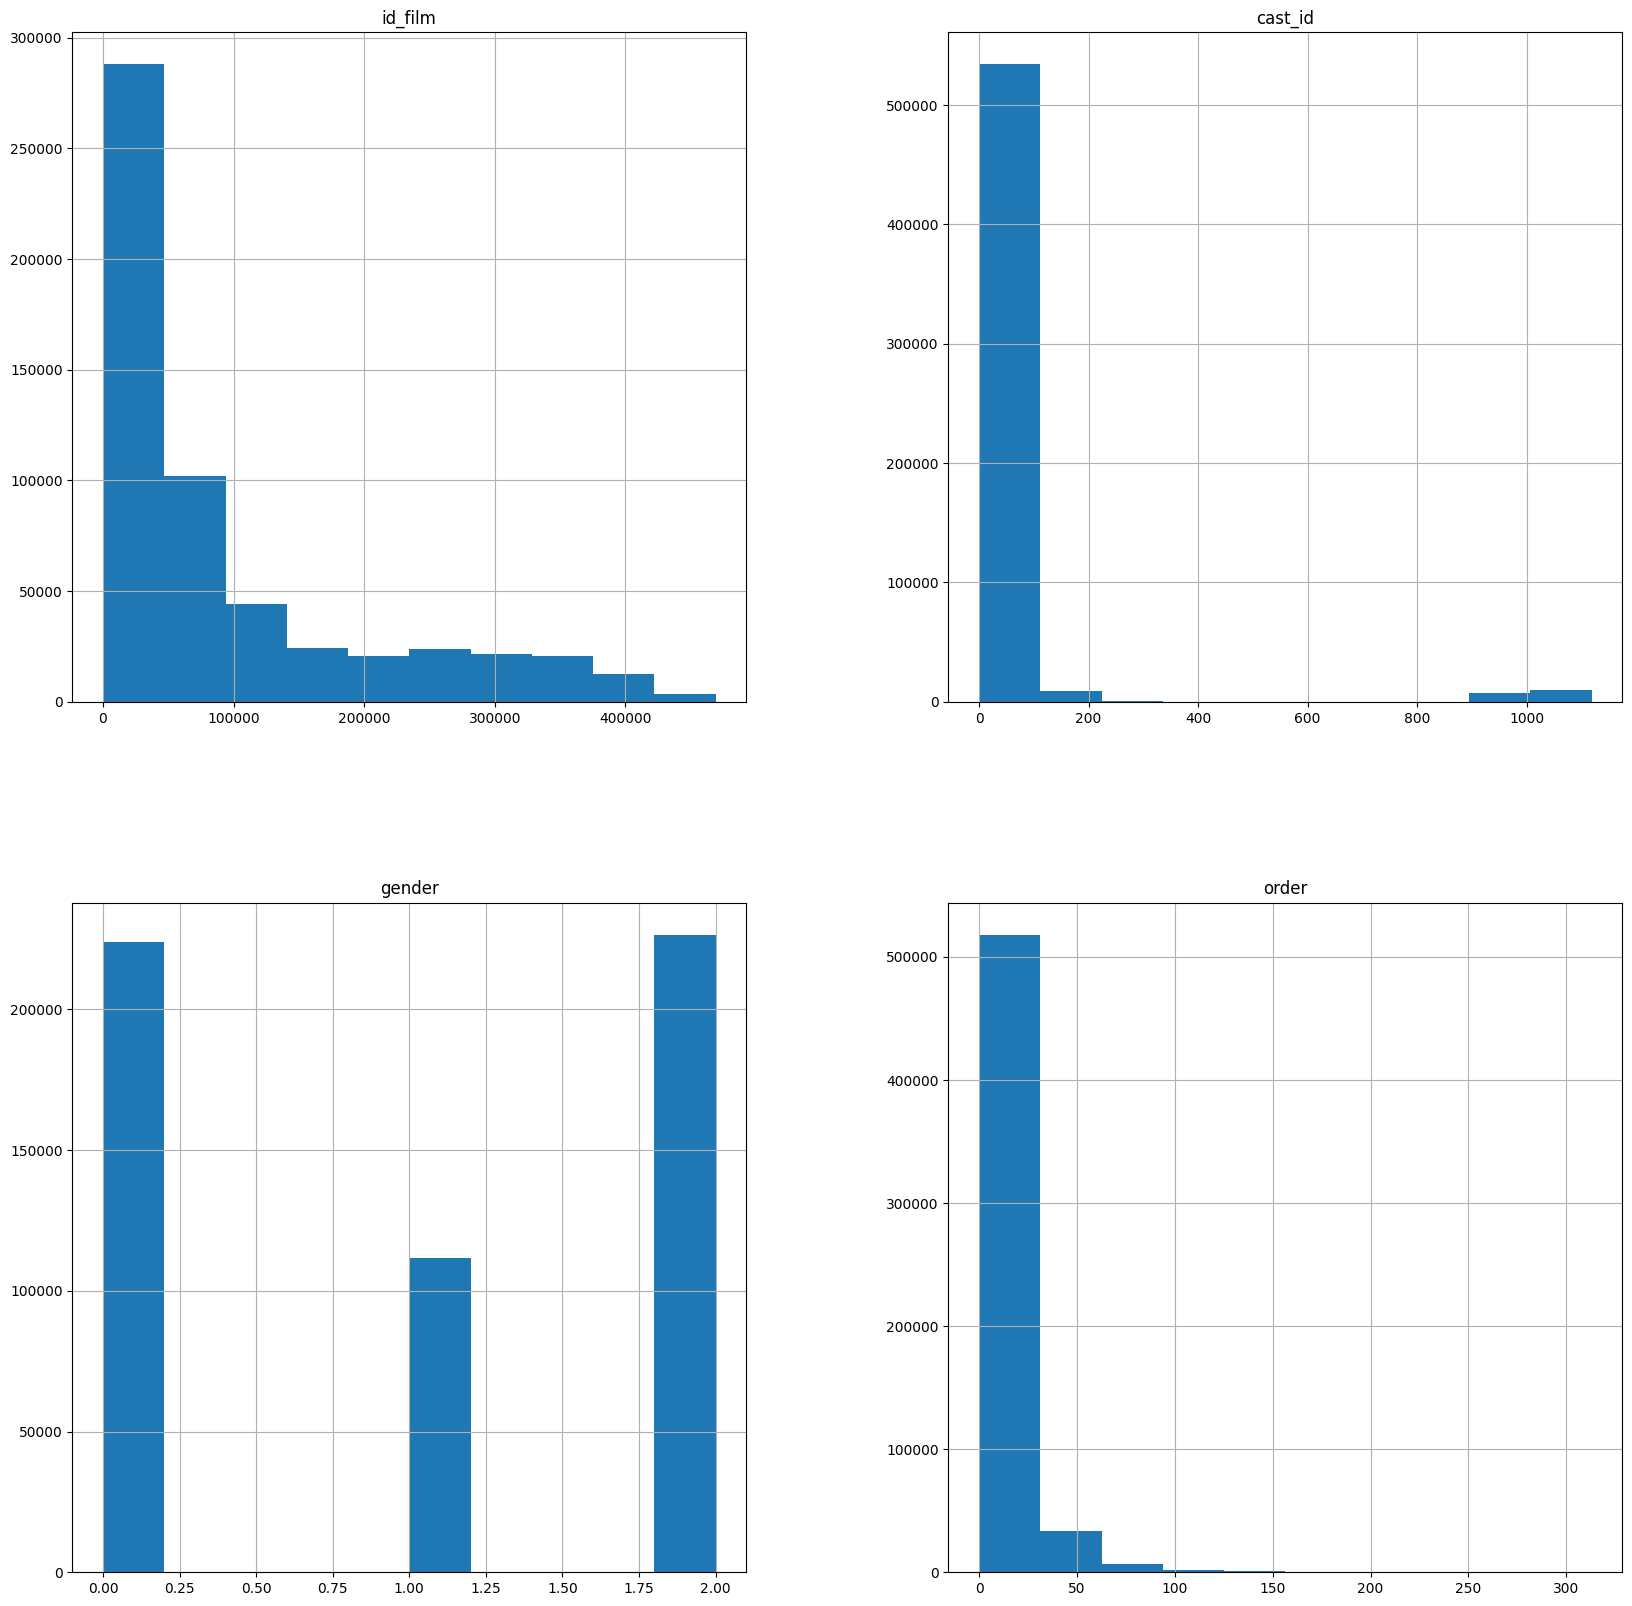

In [15]:
actors.hist(figsize=(20, 20))

## Correlacion de los datos

In [16]:
actors[["id_film", "cast_id", "gender", "order"]].corr()


,id_film,cast_id,gender,order
id_film,1.000000,-0.049606,-0.110500,-0.021153
cast_id,-0.049606,1.000000,-0.071152,0.089933
gender,-0.110500,-0.071152,1.000000,-0.155301
order,-0.021153,0.089933,-0.155301,1.000000


### Guardar el dataset

In [18]:
actors.to_csv("../Dataset/Cleaned/actors_clean.csv", index=False)